# Import Packages

In [23]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

import cv2 # Import OpenCV for face recognition with bounding box
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  

import os.path

#import Python imaging Library = PIL
from PIL import Image
import glob

# Check Tensorflow Installation

In [24]:
# showing tensorflow version
print('Tensorflow version: ', tf.__version__)

Tensorflow version:  2.3.1


# Get the Location of the Images

In [42]:
# Check if this is running on Colab or local machine and set the path to load images

# Root folder where the images are located
relative_path_to_images = '/ProjectImages'
# Location on Google Drive where the images are stored
drive_image_location = '/My Drive' + relative_path_to_images 
# Location on my computer where the images are stored and synced to Google Drive
local_image_location = 'C:/Users/smaxw/MLProject' 


# Define a function that returns the location of the files
def get_images_location(): 
  gdrive_location = '/content/drive'
  print('get_ipython: ' + str(get_ipython()))
  RunningInCOLAB = 'google.colab' in str(get_ipython())
  if RunningInCOLAB == True:
    from google.colab import drive
    drive.mount(gdrive_location, force_remount=True)
    location = gdrive_location + drive_image_location
    print('Location of images set to: ' + location)
    return location
  else:
    location = local_image_location + relative_path_to_images
    print('Location of images set to: ' + location)
    return location

print("location: ", get_images_location())

get_ipython: <ipykernel.zmqshell.ZMQInteractiveShell object at 0x00000162EC034D00>
Location of images set to: C:/Users/smaxw/MLProject/ProjectImages
location:  C:/Users/smaxw/MLProject/ProjectImages


# Preprocess the Images

In [43]:
# Get all the subdirectories
#subdirs = os.listdir('/content/drive/')
#print('Sub directories: ' , subdirs)

print(get_images_location())

subdirs = os.listdir(get_images_location())
print('Sub directories: ' , subdirs)

# Get a list of all the files in each of the subdirectories
def list_files(dir):
    r = []
    # os.walk returns a tuple
    for root, dirs, files in os.walk(get_images_location()):
        for name in files:
            r.append(os.path.join(root, name))
    return r

#print('All files: ', list_files(get_images_location()))

get_ipython: <ipykernel.zmqshell.ZMQInteractiveShell object at 0x00000162EC034D00>
Location of images set to: C:/Users/smaxw/MLProject/ProjectImages
C:/Users/smaxw/MLProject/ProjectImages
get_ipython: <ipykernel.zmqshell.ZMQInteractiveShell object at 0x00000162EC034D00>
Location of images set to: C:/Users/smaxw/MLProject/ProjectImages
Sub directories:  ['FemaleAdult50', 'FemaleMinor50', 'MaleAdult50', 'MaleMinor50']


get_ipython: <ipykernel.zmqshell.ZMQInteractiveShell object at 0x00000162EC034D00>
Location of images set to: C:/Users/smaxw/MLProject/ProjectImages
Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\00926.png


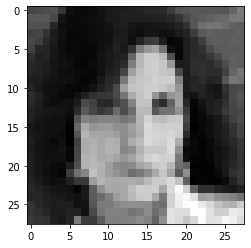

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\00928.png


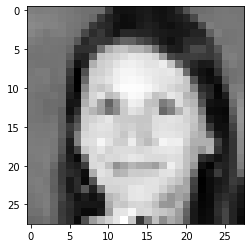

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\00937.png


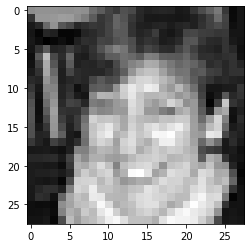

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\00952.png


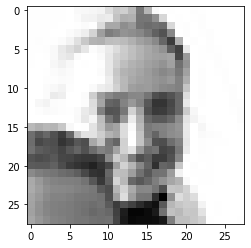

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\00956.png


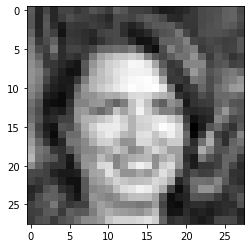

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\00964.png


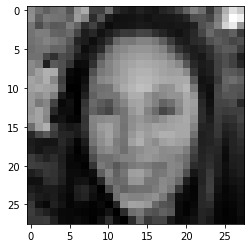

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\00967.png


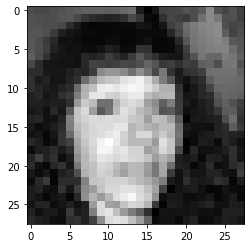

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\00970.png


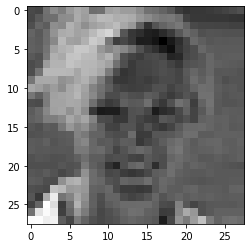

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\00976.png


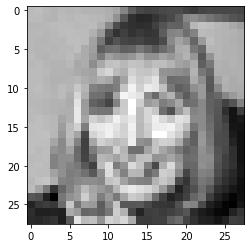

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\00977.png


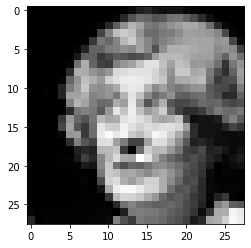

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\00994.png


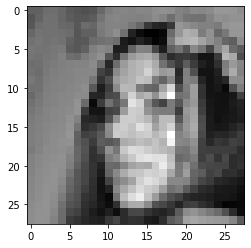

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\01004.png


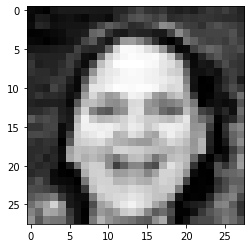

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\01007.png


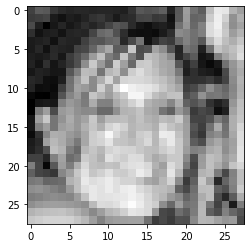

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\01016.png


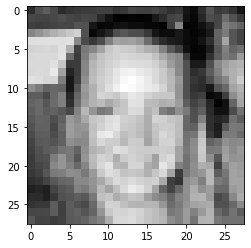

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\01017.png


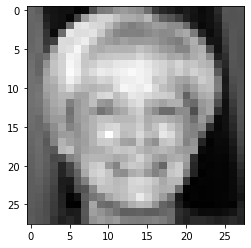

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\01023.png


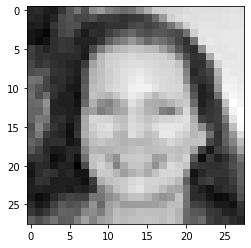

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\01029.png


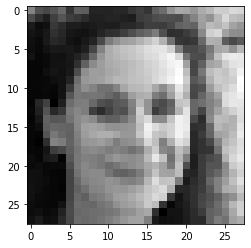

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\01037.png


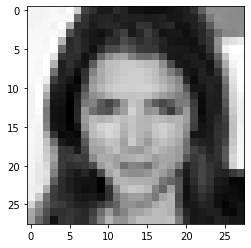

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\01042.png


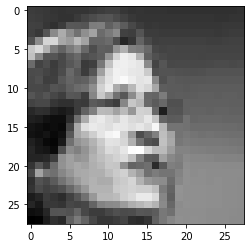

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\01089.png


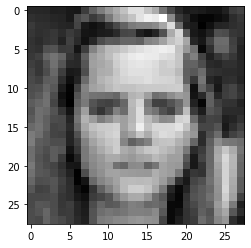

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\01138.png


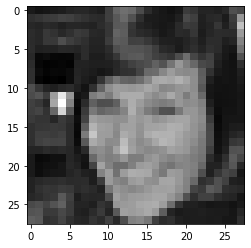

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\01198.png


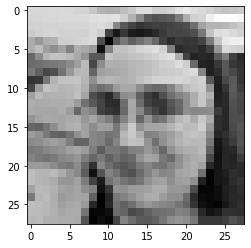

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\01252.png


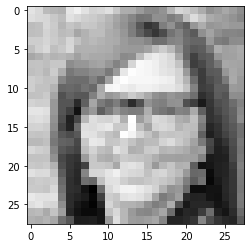

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\01271.png


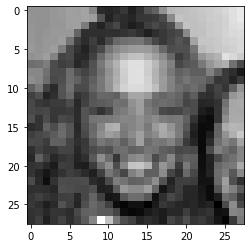

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\01278.png


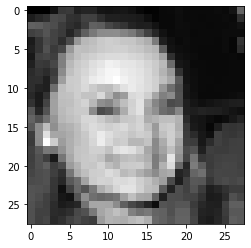

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\01306.png


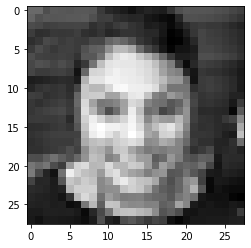

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\01322.png


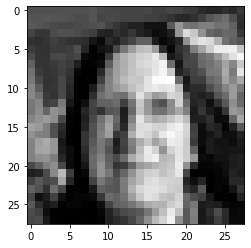

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\01327.png


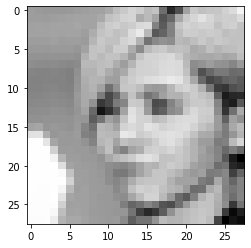

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\01328.png


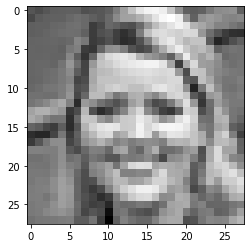

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\01654.png


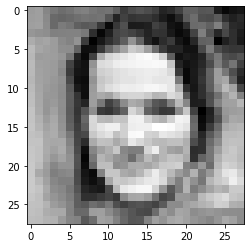

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\01675.png


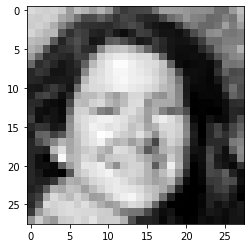

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\01680.png


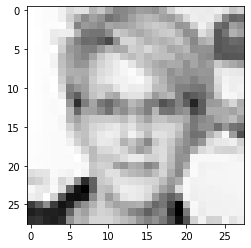

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\01682.png


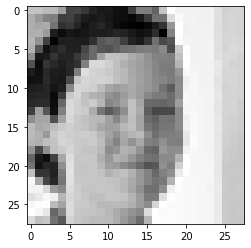

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\01688.png


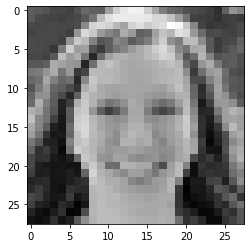

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\01725.png


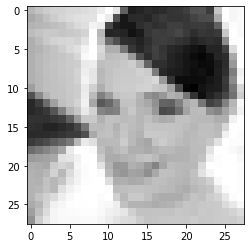

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\01740.png


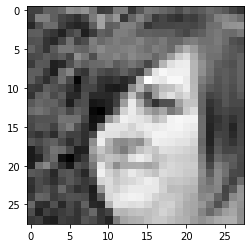

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\01964.png


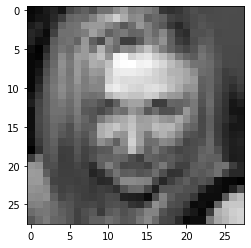

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\real_00002.jpg


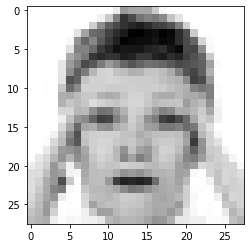

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\real_00003.jpg


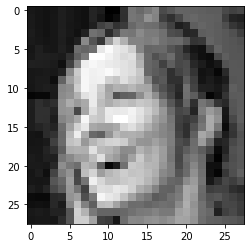

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\real_00109.jpg


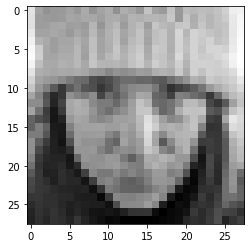

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\real_00126.jpg


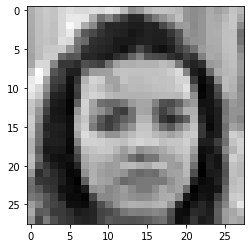

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\real_00136.jpg


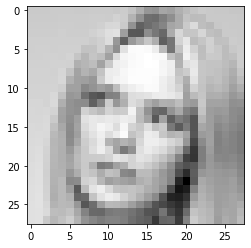

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\real_00278.jpg


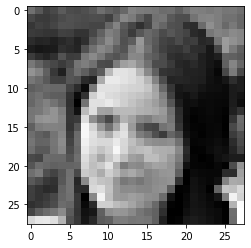

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\real_00600.jpg


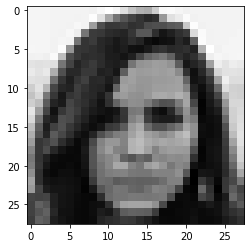

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\real_00668.jpg


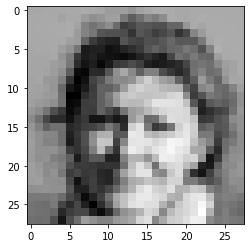

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\real_00754.jpg


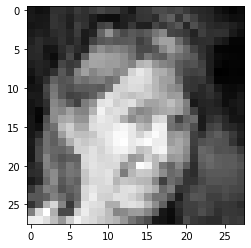

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\real_00755.jpg


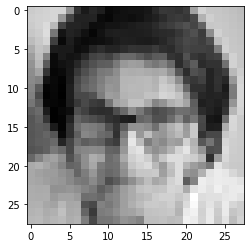

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\real_00806.jpg


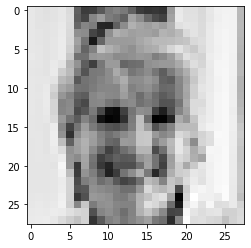

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\real_00881.jpg


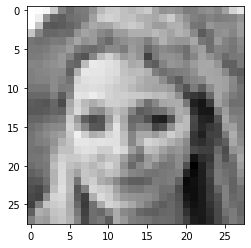

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\real_00933.jpg


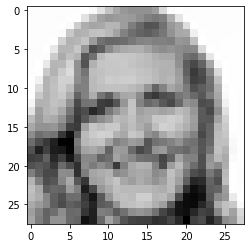

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\00942.png


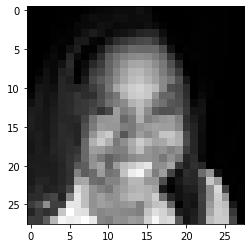

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\00950.png


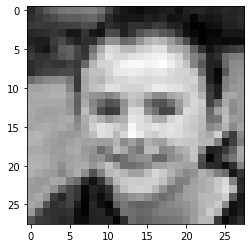

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\00981.png


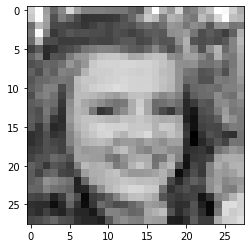

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\00989.png


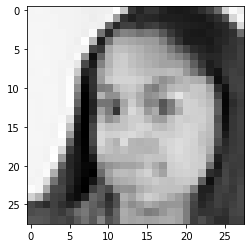

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\00999.png


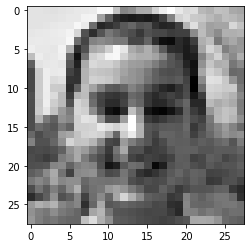

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\01075.png


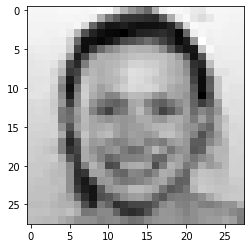

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\01177.png


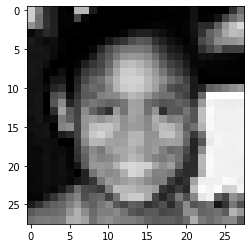

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\01182.png


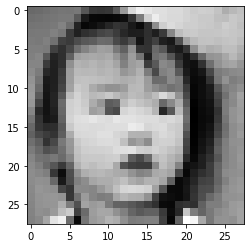

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\01223.png


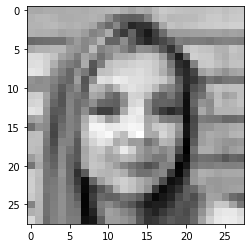

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\01251.png


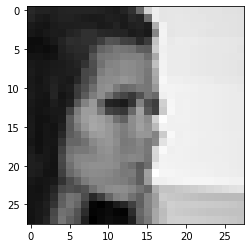

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\01254.png


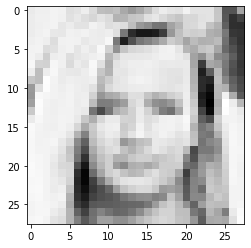

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\01255.png


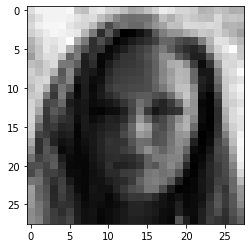

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\01318.png


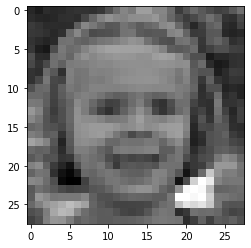

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\01326.png


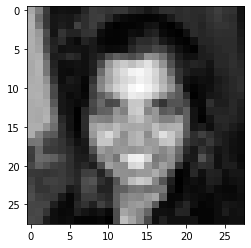

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\01368.png


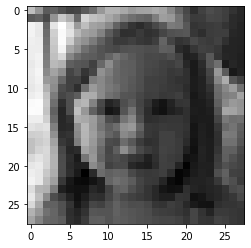

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\01457.png


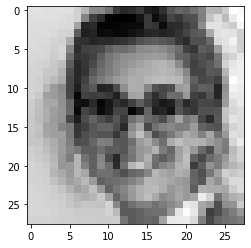

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\01636.png


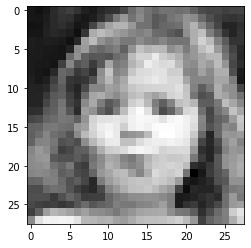

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\01977.png


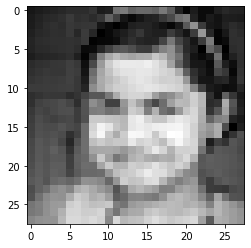

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\real_00024.jpg


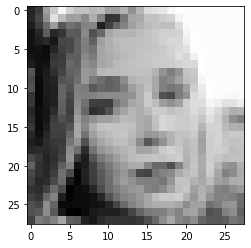

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\real_00052.jpg


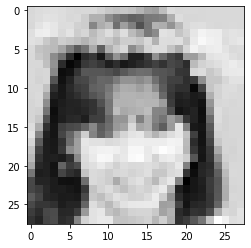

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\real_00059.jpg


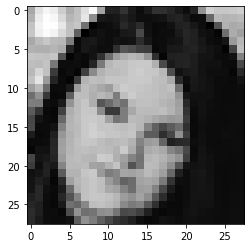

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\real_00063.jpg


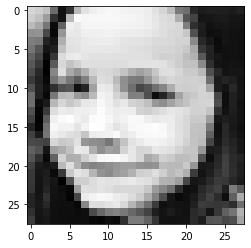

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\real_00107.jpg


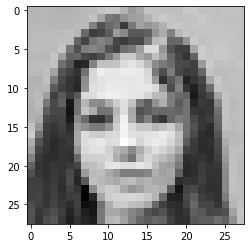

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\real_00147.jpg


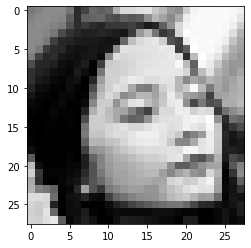

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\real_00154.jpg


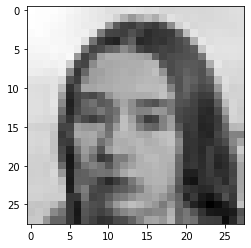

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\real_00172.jpg


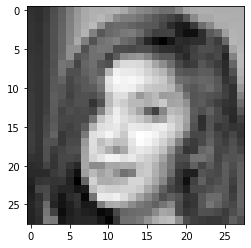

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\real_00175.jpg


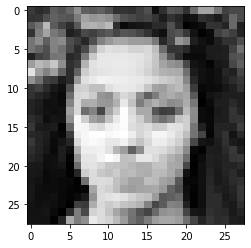

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\real_00186.jpg


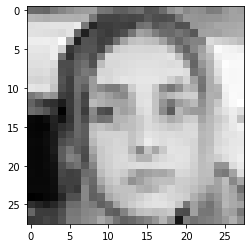

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\real_00213.jpg


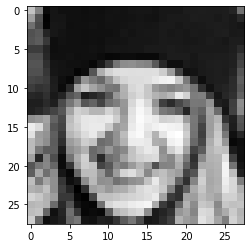

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\real_00269.jpg


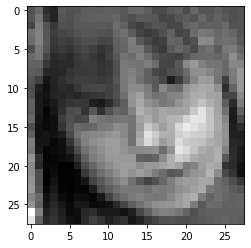

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\real_00275.jpg


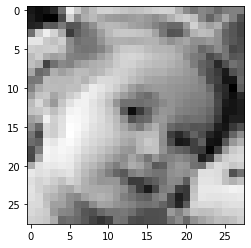

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\real_00306.jpg


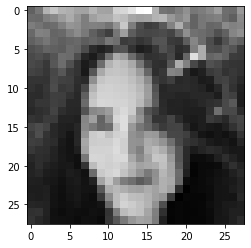

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\real_00317.jpg


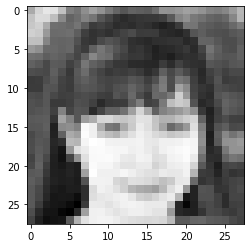

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\real_00339.jpg


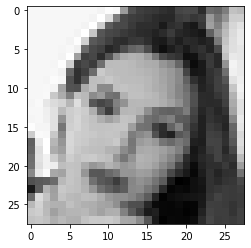

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\real_00345.jpg


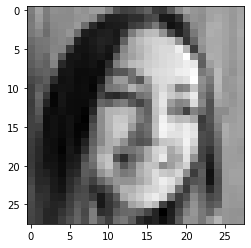

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\real_00352.jpg


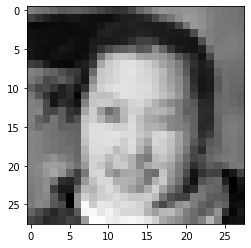

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\real_00353.jpg


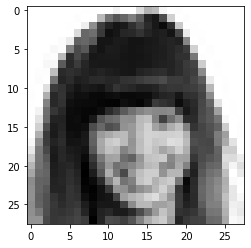

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\real_00475.jpg


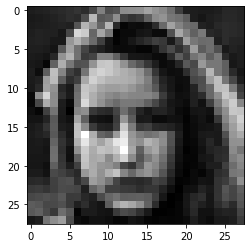

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\real_00519.jpg


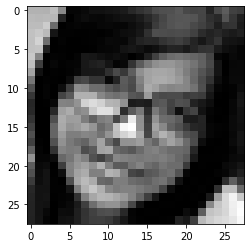

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\real_00520.jpg


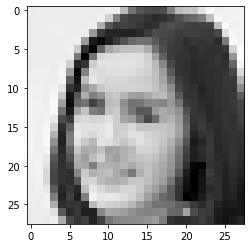

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\real_00521.jpg


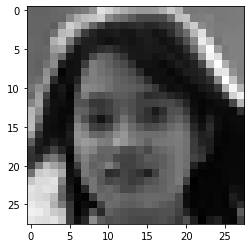

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\real_00661.jpg


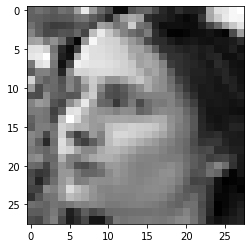

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\real_00803.jpg


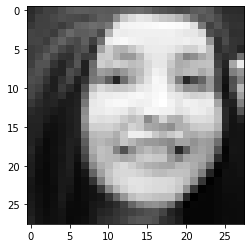

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\real_00858.jpg


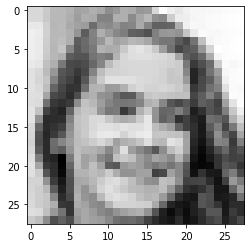

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\real_00859.jpg


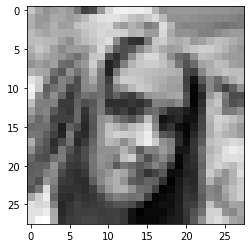

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\real_00872.jpg


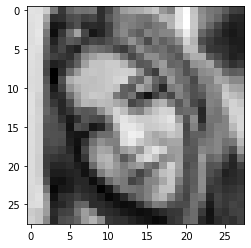

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\real_01026.jpg


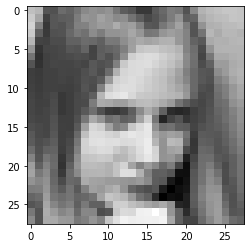

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\real_01028.jpg


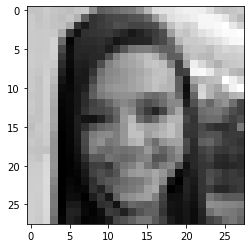

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\real_01029.jpg


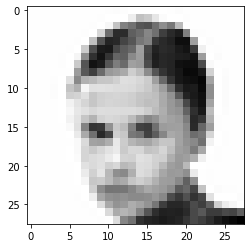

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\real_01040.jpg


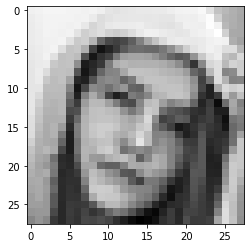

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleMinor50\real_01075.jpg


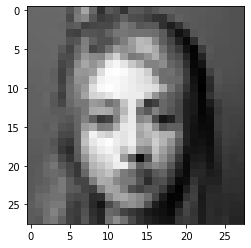

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\01000.png


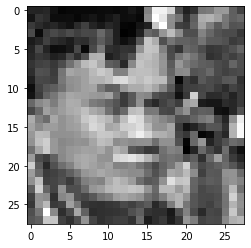

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\01003.png


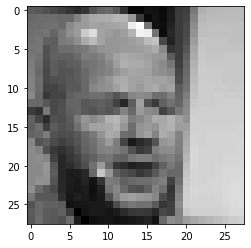

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\01005.png


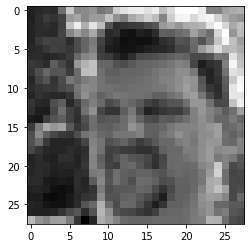

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\01014.png


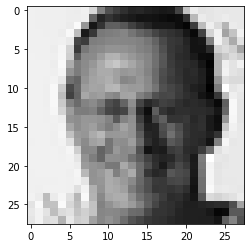

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\01025.png


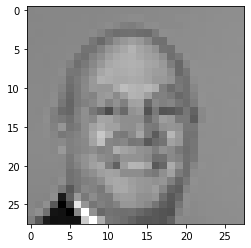

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\01027.png


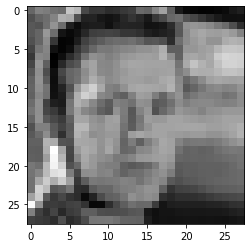

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\01060.png


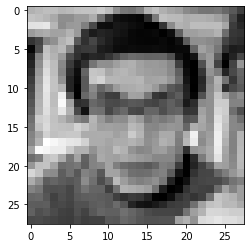

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\01092.png


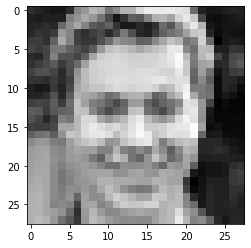

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\01121.png


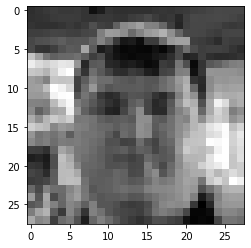

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\01180.png


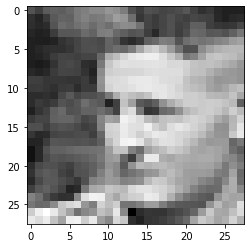

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\01212.png


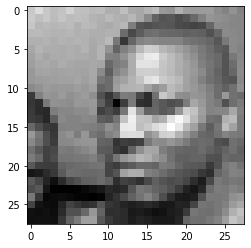

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\01260.png


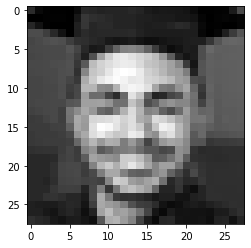

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\01349.png


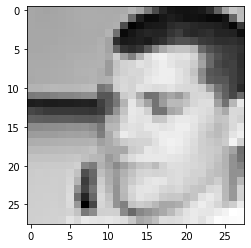

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\01468.png


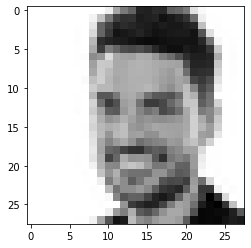

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\01502.png


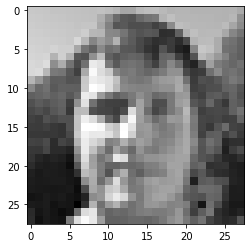

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\01742.png


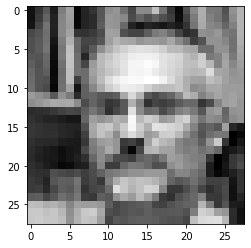

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\01759.png


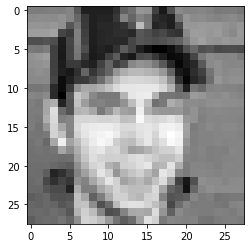

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\01792.png


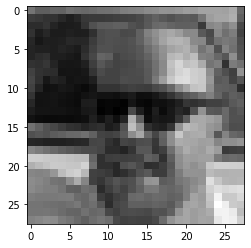

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\01849.png


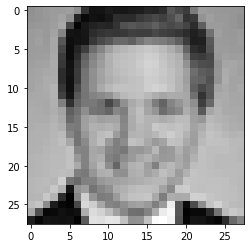

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\01858.png


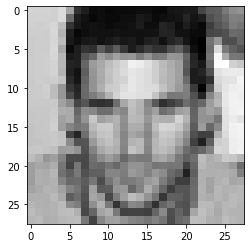

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\01888.png


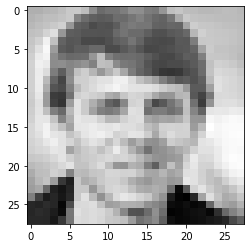

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\01889.png


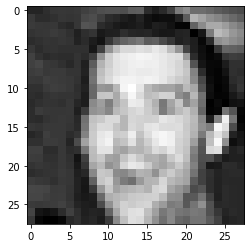

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\01893.png


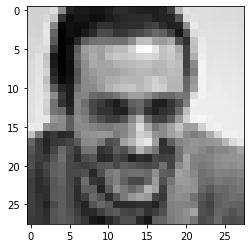

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\01955.png


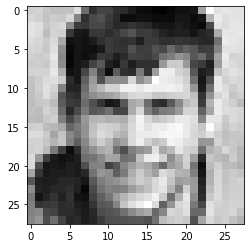

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\01956.png


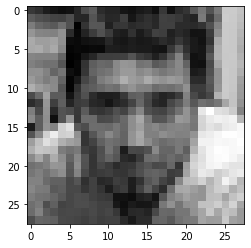

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\01978.png


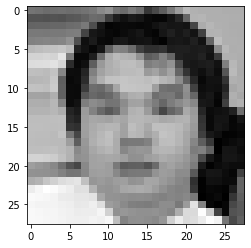

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\01979.png


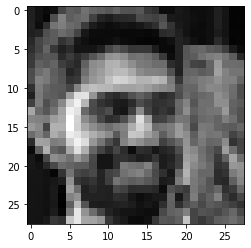

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\02100.png


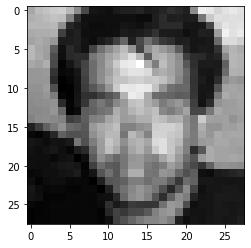

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\02117.png


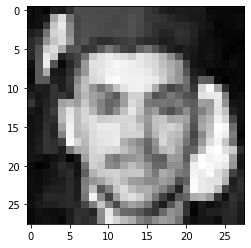

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\02175.png


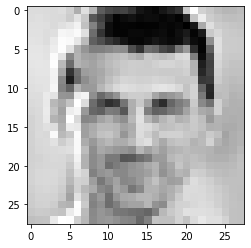

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\02176.png


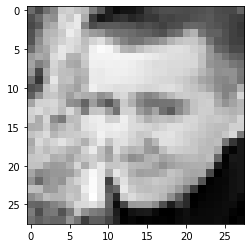

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\02213.png


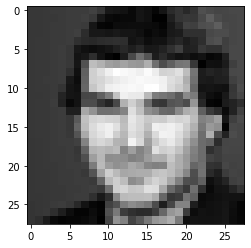

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\02372.png


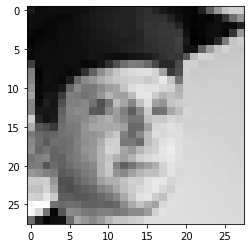

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\real_00004.jpg


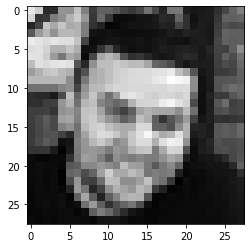

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\real_00178.jpg


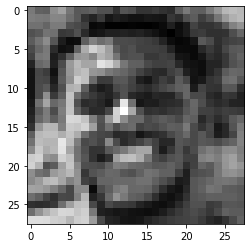

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\real_00179.jpg


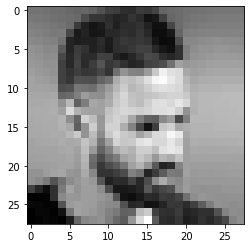

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\real_00225.jpg


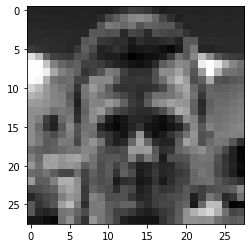

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\real_00384.jpg


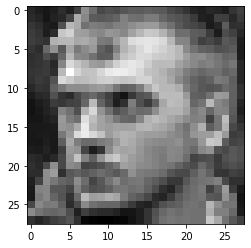

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\real_00389.jpg


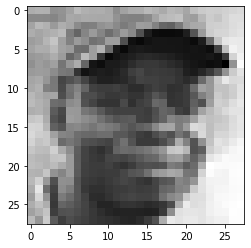

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\real_00391.jpg


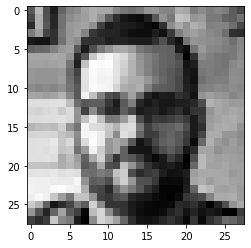

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\real_00392.jpg


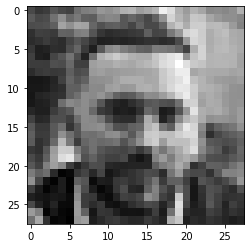

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\real_00401.jpg


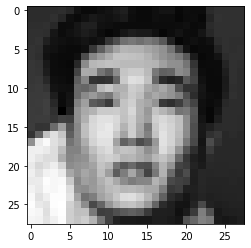

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\real_00407.jpg


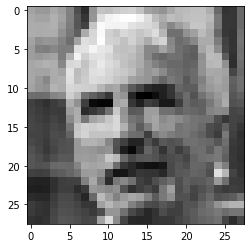

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\real_00408.jpg


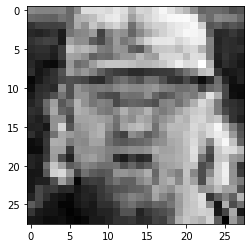

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\real_00411.jpg


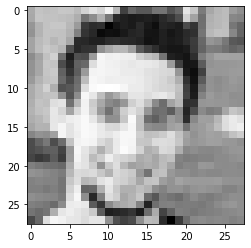

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\real_00420.jpg


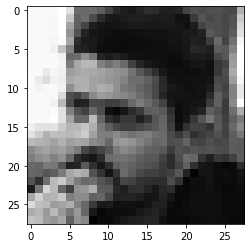

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\real_00571.jpg


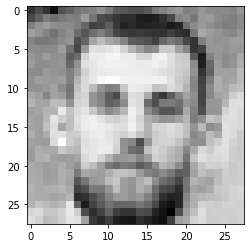

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\real_00572.jpg


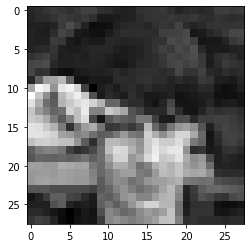

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\real_00582.jpg


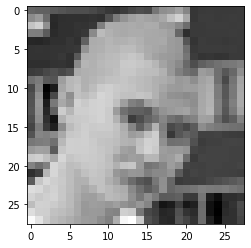

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\real_00650.jpg


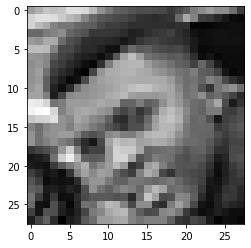

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\00953.png


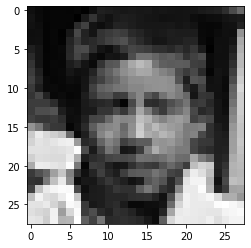

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\01006.png


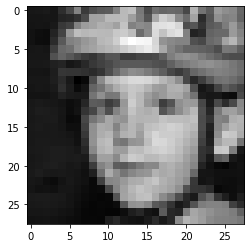

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\01020.png


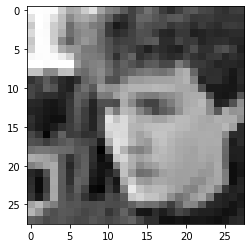

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\01066.png


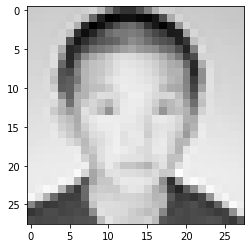

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\01196.png


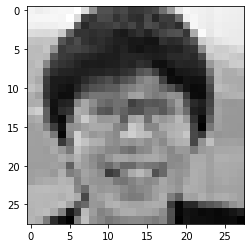

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\01298.png


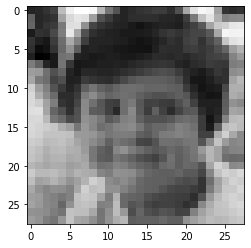

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\02303.png


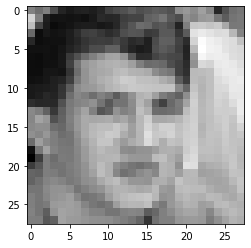

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\02614.png


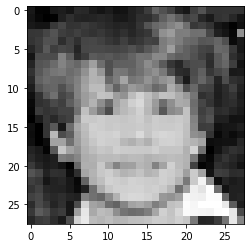

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\02858.png


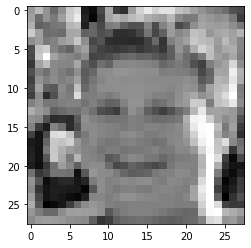

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\04222.png


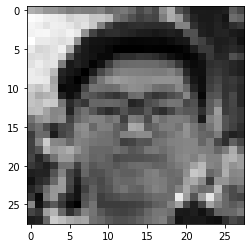

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\04786.png


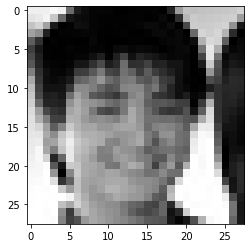

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\05027.png


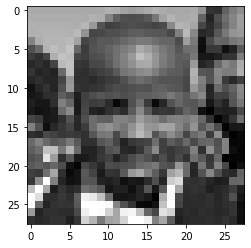

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\05147.png


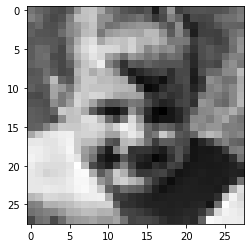

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\05191.png


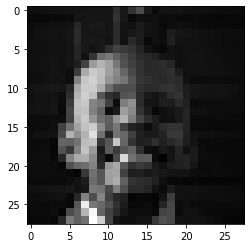

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\05268.png


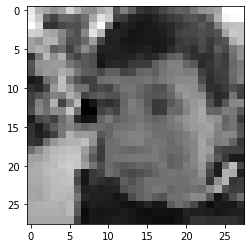

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\05275.png


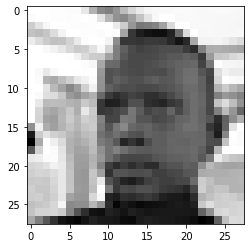

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\05279.png


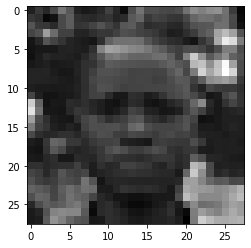

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\05664.png


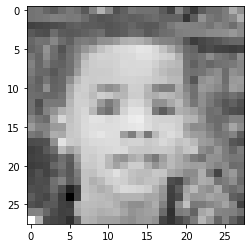

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\05670.png


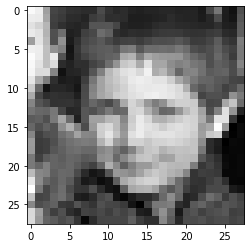

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\05681.png


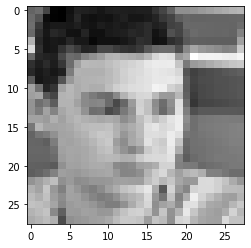

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\05796.png


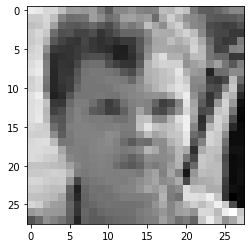

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\68036.png


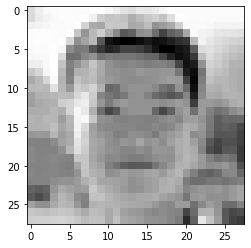

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\real_00001.jpg


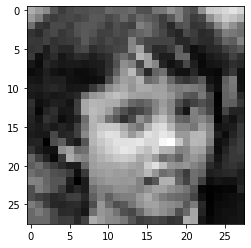

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\real_00013.jpg


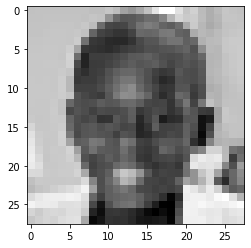

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\real_00032.jpg


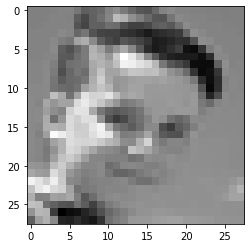

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\real_00050.jpg


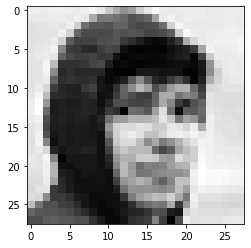

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\real_00087.jpg


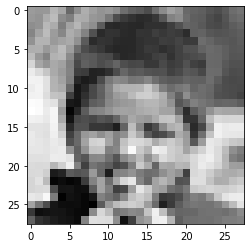

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\real_00090.jpg


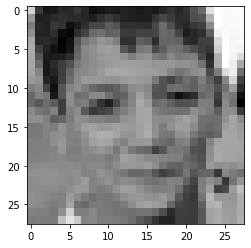

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\real_00180.jpg


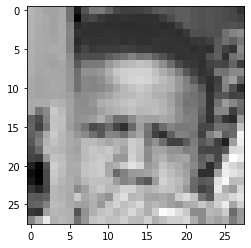

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\real_00209.jpg


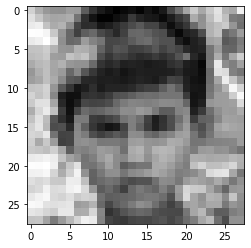

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\real_00230.jpg


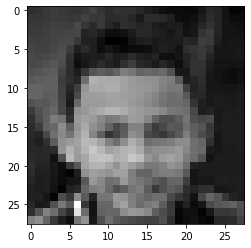

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\real_00247.jpg


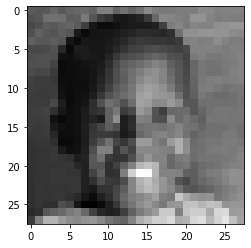

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\real_00427.jpg


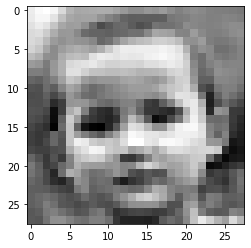

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\real_00469.jpg


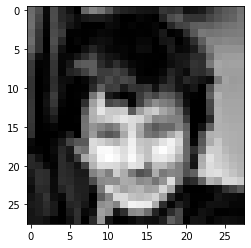

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\real_00506.jpg


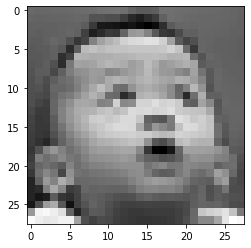

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\real_00507.jpg


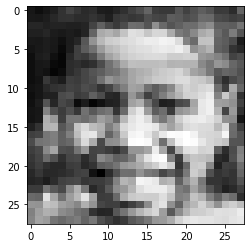

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\real_00511.jpg


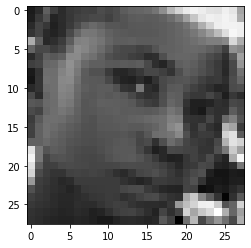

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\real_00534.jpg


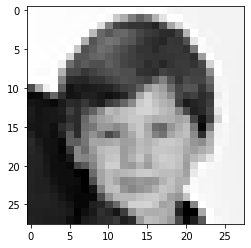

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\real_00615.jpg


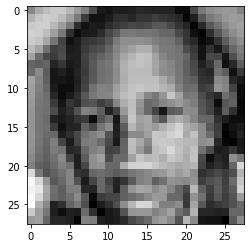

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\real_00621.jpg


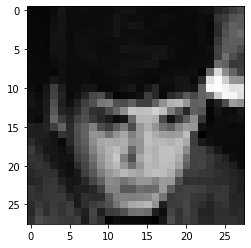

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\real_00666.jpg


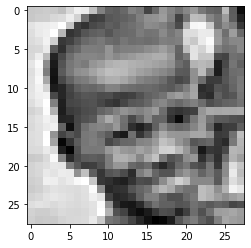

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\real_00701.jpg


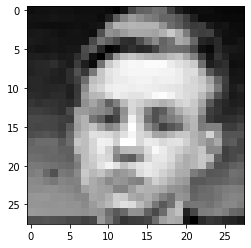

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\real_00723.jpg


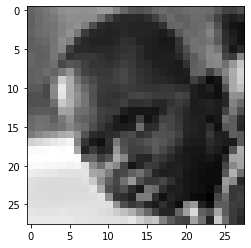

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\real_00742.jpg


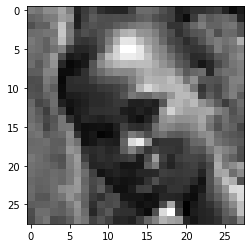

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\real_00878.jpg


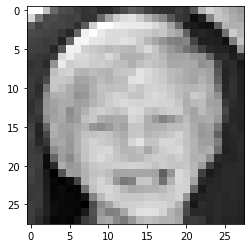

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\real_00883.jpg


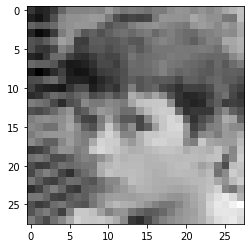

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\real_00885.jpg


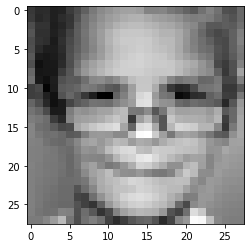

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\real_00979.jpg


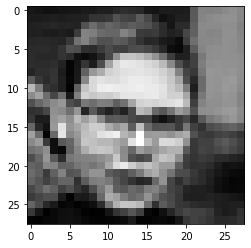

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\real_00988.jpg


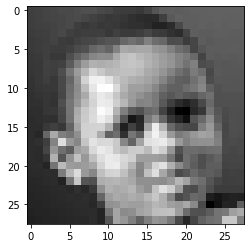

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleMinor50\real_01063.jpg


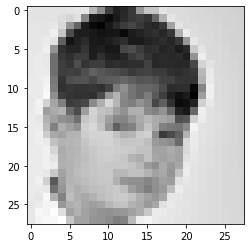

X:  [[[[ 64.  68.  72. ...  78.  92. 114.]
   [ 81.  83.  82. ...  99. 110. 112.]
   [ 75.  76.  74. ... 102.  90.  86.]
   ...
   [ 48.  37.  30. ... 168. 164. 188.]
   [ 48.  43.  36. ... 192. 218. 213.]
   [ 52.  48.  46. ... 229. 222. 203.]]]


 [[[116. 114. 115. ... 109. 107. 107.]
   [122. 121. 121. ... 110. 110. 108.]
   [126. 123. 121. ... 110. 110. 110.]
   ...
   [106. 110. 115. ...  54.  34.  20.]
   [103. 104. 112. ...  63.  32.  13.]
   [ 97.  98. 103. ...  63.  32.  10.]]]


 [[[ 93.  96.  96. ...  38.   6.  15.]
   [ 35.  99.  99. ...  44.   7.  15.]
   [ 17.  26.  69. ...  42.  10.  15.]
   ...
   [ 10.   8.   9. ...  34.  12.  13.]
   [ 10.  11.  13. ...  13.  15.  12.]
   [ 13.  13.  16. ...  14.  16.  14.]]]


 ...


 [[[ 44.  41.  38. ... 140. 144. 138.]
   [ 47.  47.  49. ... 146. 146. 137.]
   [ 51.  53.  55. ... 143. 143. 133.]
   ...
   [108.  87.  59. ...  48.  50.  52.]
   [ 71.  42.  25. ...  47.  52.  65.]
   [ 27.  26.  30. ...  58.  60.  68.]]]


 [[[ 68. 

In [44]:
# fix random seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

# size of images 28X28
width = 28
height = 28

# Initialise the arrays
X =[]
Y =[]

# For each of the subdirectories in the images folder, get the filename and preprocess it
for root, dirs, files in os.walk(get_images_location()):
    for name in files:

      # Convert each image to greay scale
      print('Opening file: ', os.path.join(root, name))
      im=Image.open(os.path.join(root, name)).convert('L')
      
      # Resize the images
      # Image.ANTIALIAS a high-quality downsampling filter
      # https://pillow.readthedocs.io/en/3.0.0/reference/Image.html
      im = im.resize((width,height),Image.ANTIALIAS)
      
      #Show each image for the CA
      plt.imshow(im, cmap=plt.cm.gray)
      plt.show()
      
      # Convert to numpy array
      arr = np.array(im)
      
      # add images and class to the two lists
      X.append(arr)
      Y.append(1)  
    
# Convert to NumPy array
X = np.array(X)

# reshape to be [samples][channels][width][height]
X = X.reshape(X.shape[0], 1, width, height).astype('float32')

print('X: ', X)

# Normalize the data
X = X /255

# one hot encode outputs
Y = np.array(Y)

# randomize the data set - numpy arrays
randomize = np.arange(len(X))
np.random.shuffle(randomize)
X = X[randomize]
Y = Y[randomize]

Y = to_categorical(Y)
num_classes = Y.shape[1]

# Build the CNN Model


In [45]:
# Building a CNN model
# Identify the part of the model Conv Layer, Pooling Layer, etc
# Look at the Keras documentaion on defining a model
np.random.seed(seed) # Initialise the seed for random number generation
tf.random.set_seed(seed) # Set the random seed in tensorflow 


modelC = Sequential() # Initialise a sequential model
# https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/ Jason Brownlee

# Add Convolutional2D layer
modelC.add(Conv2D(32, (3, 3), strides=1, padding="valid", input_shape=(1, width, height), activation='relu', data_format='channels_first'))

# Add MaxPooling layer
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))

# Flatten the 
modelC.add(Flatten())

# Add relu activation
modelC.add(Dense(128, activation='relu'))

# Add Softmax activation
modelC.add(Dense(num_classes, activation='softmax'))

# Compile the model
modelC.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
# Model fitting is a measure of how well a machine learning model generalizes to similar data 
# to that on which it was trained. A model that is well-fitted produces more accurate outcomes.
#history = modelC.fit(X, Y, validation_split=0.33, epochs=10, batch_size=32, verbose=1)
history = modelC.fit(X, Y, validation_split=0.33, epochs=2, batch_size=5, verbose=1)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

#five steps in the life-cycle are:
# Define the model. Compile the model.Fit the model. Evaluate the model. Make predictions.

Epoch 1/2


InvalidArgumentError:  Conv2DCustomBackpropFilterOp only supports NHWC.
	 [[node gradient_tape/sequential/conv2d/Conv2D/Conv2DBackpropFilter (defined at <ipython-input-45-6b4201df8c13>:33) ]] [Op:__inference_train_function_717]

Function call stack:
train_function




```
# This is formatted as code
```

# New Section